**Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек**.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и *какие гипотезы на ее основе можно выдвинуть*.

**Откуда брать данные?**

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, [kaggle.com](https://www.kaggle.com/)). Если идей нет, можете взять один из перечисленных ниже:

* [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
* [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
* [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).

In [457]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [460]:
passenger = pd.read_csv(
    'russian-passenger-air-service-20072020/russian_passenger_air_service_2.csv')
passenger

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,Yakutsk,2007,27636.0,25976.0,34291.0,38803.0,38478.0,59142.0,67295.0,75257.0,52681.0,44505.0,40439.0,1916.60,545577.0,"(Decimal('129.750225'), Decimal('62.086594'))"
3957,Yakutsk (Magan),2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('-6.226888'), Decimal('8.607871'))"
3958,Yamburg,2007,6239.0,3195.0,6648.0,6268.0,6088.0,6028.0,5975.0,6024.0,6262.0,6451.0,6968.0,8.87,72626.0,"(Decimal('75.097783'), Decimal('67.980026'))"
3959,Yaroslavl (Tunoshna),2007,557.0,720.0,650.0,411.0,328.0,864.0,688.0,965.0,883.0,505.0,640.0,2055.60,8277.0,"(Decimal('40.170054'), Decimal('57.56231'))"


<BarContainer object of 14 artists>

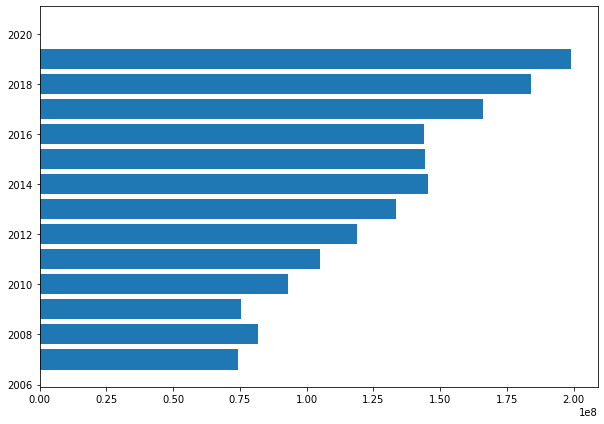

In [461]:
passenger_barh = passenger.groupby('Year').sum().reset_index().sort_values(by='Whole year', ascending=False)
# passenger_barh
plt.barh(passenger_barh['Year'], passenger_barh['Whole year'])


# количество перевезенных пассажиров с 2007 по 2019 года по убыванию. На основе диаграммы можно сделать вывод, 
# что с каждым годом пассажиропоток увеличивается. 


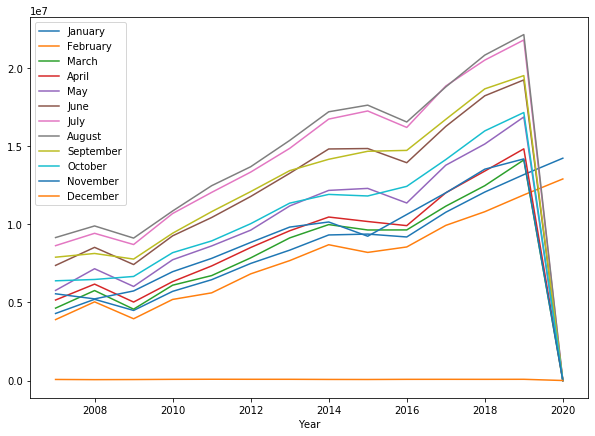

In [305]:
passenger_month = passenger.groupby('Year').sum()
# passenger_month = passenger_month[passenger_month['Year'] != 2020]

passenger_month[[ 'January','February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October',
                 'November', 'December']].plot()


# количество перевезенных пассажиров по месяцам с 2007 по 2020 года.

In [462]:
passenger_style = passenger[['Airport name', 'Whole year']].groupby('Airport name').sum()\
.sort_values(by='Whole year', ascending=False).head(10)
passenger_style.style.bar()


# Топ-10 загруженных аэропортов России по пассажиропотоку с 2007  по 2020 года. 
# Из 10 самых загруженных аэропортов можно сделать вывод, что Шереметьево и Домодедово самые загруженные аэропорты страны.
# Внуково и Пулково занимают 3 и 4 строчку, у них в 3 раза меньше поток пассажиров. 

,Whole year
Airport name,
Moscow (Sheremetyevo),370628122.000000
Moscow (Domodedovo),345111635.000000
Moscow (Vnukovo),167088467.000000
Saint Petersburg (Pulkovo),156836687.000000
Ekaterinburg (Koltsovo),51067330.000000
Novosibirsk (Tolmachyovo),45308719.000000
Sochi,44258793.000000
Krasnodar (Paszkowski),36448856.000000
Ufa,27309206.000000


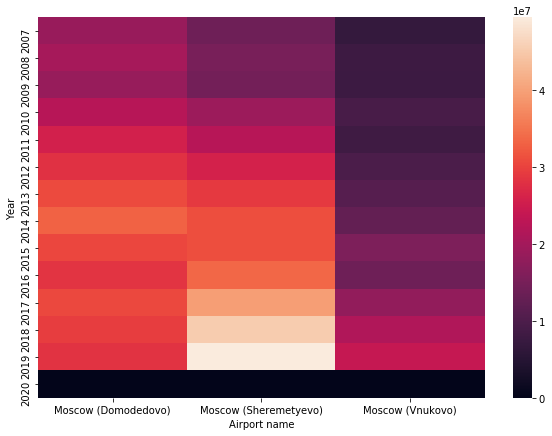

In [417]:
passenger_filter = passenger[passenger['Airport name']\
                             .isin(['Moscow (Sheremetyevo)', 'Moscow (Domodedovo)', 'Moscow (Vnukovo)'])]

passenger_heatmap = passenger_filter.pivot_table(
                        index='Year', 
                        columns='Airport name', 
                        values='Whole year', 
                        aggfunc=sum)


sns.heatmap(passenger_heatmap)


# Загруженность трех аэропортов Москвы - Домодедово, Шереметьево, Внуково, по годам. 
# Можно сделать вывод, что самый загруженный аэропорт Шереметьево, особенно с 2015 года.
# Второй аэропорт по загруженности является Домодедово.

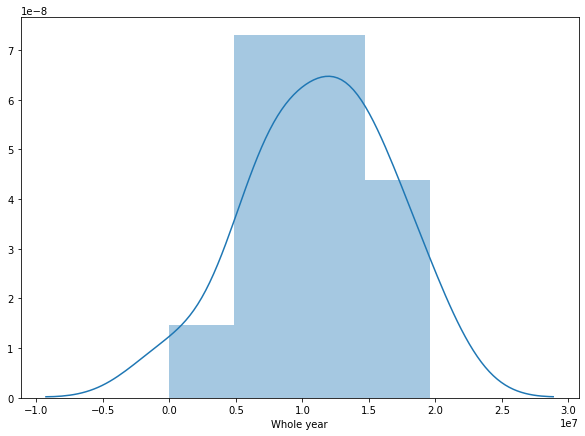

In [463]:
passenger_distplot = passenger[passenger['Airport name'].isin(['Saint Petersburg (Pulkovo)'])]

sns.distplot(passenger_distplot['Whole year'])

# Гистограмма и график плотности распределения пассажиропотока аэропорта Санкт-Петербурга с 2007 по 2020 года
# 

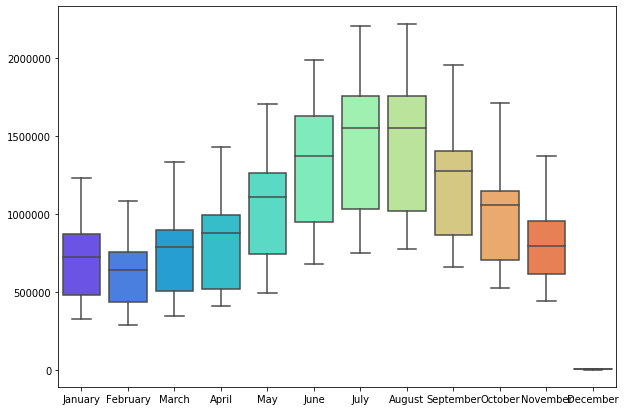

In [488]:
pp = passenger_distplot[passenger_distplot['Year'] != 2020]

p = pp[[ 'January','February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October',
                 'November', 'December']]

sns.boxplot( data=p, palette='rainbow')
# Распределение по месяцам пассажиропотока Пулкова за 2019 год.
# Пик пассажиропотока - июнь, июль, август.